# Dataset Token Types

Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

COLORS = {
    'BIG': '#66CDAA',
    'CVS': '#FF0000',
    'JLT': '#FFD700',
    'MNY': '#C71585',
    'NTR': '#00FF00',
    'TBO': '#0000FF',
    'VDC': '#1E90FF',
    'WILD': '#000000',
}

plt.style.use(['science', 'no-latex' ])

# Load and order columns
start = ['token_type', 'WILD']
df = pd.read_csv('data/by_dataset/token_type.csv')
df = df[start + [ c for c in df.columns if c not in start ]]
df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)
df

,token_type,WILD,BIG,CVS,JLT,MNY,NTR,TBO,VDC
0,decltype,150191,6,0,0,90,0,0,32
1,dynamic_cast,247699,7,0,0,0,0,0,3796
2,.*,10360,7,0,0,377,0,0,102
3,throw,826948,17,0,369,355,0,0,6848
4,char32_t,21643,21,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...
125,protected,123242,0,0,0,3082,0,0,35
126,thread_local,7505,0,0,0,0,0,0,7
127,typeid,53724,0,0,0,0,0,0,536
128,alignas,9188,0,0,0,0,0,0,0


## Missing Tokens
Print missing tokens for each dataset.

In [2]:
from IPython.display import HTML

# Get the WILD token frequency
freq = df.WILD / df.WILD.sum()

# Find the missing tokens and calculate their frequency.
missing = df.copy()
missing.iloc[:, 1:] = (missing.iloc[:, 1:] == 0).astype(int)

tmp = pd.DataFrame()
tmp['count'] = missing.iloc[:, 1:].sum()
tmp['%'] = missing.iloc[:, 1:].sum() / df.shape[0]
tmp['used %'] = missing.iloc[:, 1:].multiply(freq, axis=0).sum().sort_values()
tmp['tokens'] = [ ', '.join(missing.token_type[missing[c] == 1]) for c in missing.columns[1:] ]
tmp = tmp.sort_values(by='used %')
tmp.style.format({ '%': '{:.1%}', 'used %': '{:.3%}' })

,count,%,used %,tokens
WILD,0,0.0%,0.000%,
VDC,2,1.5%,0.001%,"alignas, noexcept"
BIG,8,6.2%,0.002%,"alignof, friend, mutable, protected, thread_local, typeid, alignas, noexcept"
MNY,11,8.5%,0.018%,"dynamic_cast, char32_t, static_assert, ->*, constexpr, char16_t, PointerLiteral, thread_local, typeid, alignas, noexcept"
CVS,23,17.7%,0.061%,"decltype, dynamic_cast, .*, throw, char32_t, static_assert, ->*, constexpr, catch, char16_t, asm, virtual, reinterpret_cast, auto, PointerLiteral, static_cast, friend, mutable, protected, thread_local, typeid, alignas, noexcept"
JLT,43,33.1%,0.317%,"decltype, dynamic_cast, .*, char32_t, static_assert, typename, ->*, export, %=, template, constexpr, char16_t, override, final, signed, asm, const_cast, explicit, /=, <<=, >>=, MultiLineMacro, ^=, *=, ^, UserDefinedLiteral, enum, auto, inline, register, &=, PointerLiteral, static_cast, continue, +=, alignof, friend, mutable, protected, thread_local, typeid, alignas, noexcept"
TBO,74,56.9%,4.954%,"decltype, dynamic_cast, .*, throw, char32_t, operator, static_assert, using, public, typename, ->*, export, namespace, %=, template, extern, constexpr, catch, char16_t, override, try, final, signed, asm, const_cast, explicit, /=, class, ..., <<=, >>=, MultiLineMacro, volatile, ^=, private, virtual, reinterpret_cast, *=, delete, ^, UserDefinedLiteral, enum, short, auto, inline, register, &=, PointerLiteral, static_cast, -=, --, double, ~, continue, new, /, |=, this, |, long, bool, BooleanLiteral, const, Not, ::, ->, alignof, friend, mutable, protected, thread_local, typeid, alignas, noexcept"
NTR,92,70.8%,11.547%,"decltype, dynamic_cast, .*, throw, char32_t, operator, static_assert, using, public, typename, ->*, export, namespace, %=, template, extern, constexpr, catch, char16_t, override, try, final, signed, typedef, asm, const_cast, explicit, wchar_t, /=, class, ..., <<=, >>=, MultiLineMacro, volatile, ^=, union, private, virtual, reinterpret_cast, delete, ^, UserDefinedLiteral, do, enum, short, auto, inline, register, &=, PointerLiteral, static_cast, -=, --, ~, default, continue, new, switch, |=, this, ?, |, long, bool, CharacterLiteral, sizeof, unsigned, goto, OrOr, static, BooleanLiteral, char, ++, case, +, const, :, struct, ], [, ::, ., ->, alignof, friend, mutable, protected, thread_local, typeid, alignas, noexcept"


## Percent Difference with WILD
Normalize by the most frequent token.

In [3]:
norm = df.copy()
norm.iloc[:, 1:] /= norm.iloc[:, 1:].max()
norm = norm.sort_values(by='WILD', ascending=False)
norm

,token_type,WILD,BIG,CVS,JLT,MNY,NTR,TBO,VDC
121,Identifier,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00
117,",",3.825780e-01,1.638128e-01,0.231190,0.104965,4.484645e-01,0.262406,0.094670,1.643409e-01
114,IntegerLiteral,2.651061e-01,7.621137e-02,0.146050,0.157941,2.361259e-01,0.197072,0.440997,8.310203e-02
120,(,2.544164e-01,2.885549e-01,0.295071,0.467887,2.819363e-01,0.332381,0.238133,2.841375e-01
119,),2.543967e-01,2.885215e-01,0.295073,0.467887,2.806128e-01,0.332381,0.238133,2.841415e-01
...,...,...,...,...,...,...,...,...,...
4,char32_t,2.873542e-06,2.834020e-06,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.263759e-07
122,alignof,2.139589e-06,0.000000e+00,0.000006,0.000000,1.923189e-08,0.000000,0.000000,5.213008e-07
2,.*,1.375498e-06,9.446732e-07,0.000000,0.000000,1.450084e-06,0.000000,0.000000,1.611293e-06
128,alignas,1.219891e-06,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00


Calculate the percent difference between each dataset and WILD. Drop EOF.

In [4]:
diff = norm.loc[:, norm.columns != 'WILD'].copy()
diff.iloc[:, 1:] = diff.iloc[:, 1:].subtract(norm.WILD, axis=0).div(norm.WILD, axis=0)
diff = diff.replace(-1, np.nan)

display(diff.iloc[:, 1:].abs().describe().round(1))

display(diff[diff.token_type == 'EOF'])

diff = diff[diff.token_type != 'EOF']

,BIG,CVS,JLT,MNY,NTR,TBO,VDC
count,122.0,107.0,87.0,119.0,38.0,56.0,128.0
mean,0.6,0.6,6.2,0.9,3.5,5.2,0.6
std,1.3,0.6,37.0,1.9,6.9,11.4,1.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.2,0.5,0.2,0.3,0.7,0.2
50%,0.4,0.4,0.8,0.5,0.8,0.9,0.4
75%,0.7,0.8,1.0,0.9,3.2,2.9,0.8
max,13.0,4.1,344.4,20.1,32.0,57.1,13.6


,token_type,BIG,CVS,JLT,MNY,NTR,TBO,VDC
102,EOF,13.000039,-0.643561,9.185681,-0.376799,15.065072,55.006772,13.610745


### Boxplot

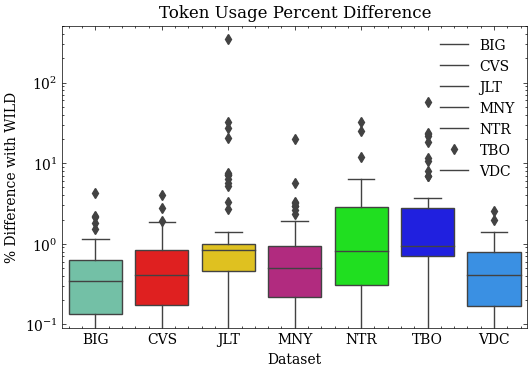

In [5]:
d2 = diff.iloc[:, 1:].copy().abs()
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = fig.gca()
sns.boxplot(x='variable', y='value', data=pd.melt(d2), ax=ax, palette=COLORS)
ax.set_yscale('log')
ax.legend(diff.columns[1:])
ax.set_xlabel('Dataset')
ax.set_ylabel('% Difference with WILD')
ax.set_title('Token Usage Percent Difference')
plt.show()

In [15]:
metrics = pd.DataFrame({
    'median': diff.iloc[:, 1:].abs().median() * 100,
    'mean'  : diff.iloc[:, 1:].abs().mean() * 100,
    'sum'   : diff.iloc[:, 1:].abs().sum() * 100,
}).round(1)

display(metrics)

metrics.mean()

,median,mean,sum
BIG,34.5,48.1,5824.8
CVS,40.9,59.7,6331.2
JLT,82.9,612.2,52649.2
MNY,50.0,86.0,10148.8
NTR,81.4,316.1,11696.1
TBO,93.9,432.8,23804.4
VDC,41.5,49.0,6218.4


median       60.728571
mean        229.128571
sum       16667.557143
dtype: float64

In [7]:
df2 = diff.copy()
df2.iloc[:, 1:] = df2.iloc[:, 1:]

tops = pd.DataFrame()

for col in df2.columns[1:]:
    sub = df2[['token_type', col]].copy()
    sub['abs'] = sub[col].abs()
    sub = sub.sort_values(by='abs', ascending=False)
    sub = sub[sub != -1].dropna().head(20)
    tops[(col, 'type')] = sub.token_type.values
    tops[(col, '%dif')] = sub[col].values * 100

tops.columns = pd.MultiIndex.from_tuples(tops.columns)
tops.round(1).style.background_gradient(cmap='Spectral')